#Final Data cleaned
### population and CO2 emission
### temperature

####  1- upload data

In [61]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
df1= pd.read_csv('../Data/Clean Data/1. co2_population_cleaned.csv')
df2= pd.read_csv('../Data/Clean Data/2. Temperature_cleaned.csv')

#### 2- Call the data

In [30]:
df1


,country,year,population,co2_emission
0,Aruba,1960,54608,11092.675000
1,Africa Eastern and Southern,1960,130692579,118545.901306
2,Afghanistan,1960,8622466,414.371000
3,Africa Western and Central,1960,97256290,8760.463000
4,Angola,1960,5357195,550.050000
...,...,...,...,...
13918,Samoa,2019,211905,300.000012
13919,"Yemen, Rep.",2019,31546691,11100.000381
13920,South Africa,2019,58087055,439640.014648
13921,Zambia,2019,18380477,6800.000191


In [31]:
df2

,country_name,1999,2000,2001,2002,2003,2004,2005,2006,2007,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,"Afghanistan, Islamic Rep. of",1.301,1.109,1.366,1.384,0.615,1.427,0.491,1.78,0.736,...,1.646,1.446,0.234,1.308,0.457,1.101,1.607,1.568,1.58,0.96
1,Albania,0.722,1.112,1.555,0.492,1.023,0.462,0.255,0.426,1.45,...,1.274,1.108,1.568,1.444,1.322,1.665,1.601,1.269,2.146,1.823
2,Algeria,1.456,0.798,1.827,1.222,1.567,0.964,1.238,1.373,1.198,...,2.249,1.39,1.128,1.173,1.676,1.101,1.736,1.498,1.211,1.094
3,American Samoa,0.243,0.67,0.948,1.196,0.719,0.215,0.844,0.446,0.894,...,1.047,0.642,0.646,0.883,0.554,0.394,0.924,0.82,0.574,0.924
4,"Andorra, Principality of",1.02,1.015,1.476,0.828,1.946,0.919,0.835,1.463,0.974,...,0.411,1.617,1.196,0.757,1.857,1.546,1.83,1.771,1.761,1.813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,Western Sahara,0.935,0.865,1.255,1.179,1.349,1.47,1.092,1.317,0.851,...,1.819,1.432,1.234,1.282,1.244,1.277,1.636,2.078,0.851,1.43
223,World,0.787,0.732,0.833,1.018,0.89,0.908,1.09,0.982,1.181,...,1.205,0.907,1.058,1.007,1.042,1.406,1.658,1.424,1.284,1.449
224,"Yemen, Rep. of",Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
225,Zambia,0.418,0.311,0.501,0.956,1.159,0.801,1.339,0.61,1.075,...,1.481,0.965,0.926,0.746,0.638,1.486,1.474,0.721,0.727,1.295


#### reshape the termperature dataset to short version that contains 3 collumns (country, year, temprature)

In [35]:
reshaped_df2= df2.melt(id_vars=['country_name'], var_name='year', value_name='temperature')
reshaped_df2


,country_name,year,temperature
0,"Afghanistan, Islamic Rep. of",1999,1.301
1,Albania,1999,0.722
2,Algeria,1999,1.456
3,American Samoa,1999,0.243
4,"Andorra, Principality of",1999,1.02
...,...,...,...
4762,Western Sahara,2019,1.43
4763,World,2019,1.449
4764,"Yemen, Rep. of",2019,Unknown
4765,Zambia,2019,1.295


In [26]:
len(reshaped_df2['country_name'].unique())
df2

,country,1999,2000,2001,2002,2003,2004,2005,2006,2007,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,"Afghanistan, Islamic Rep. of",1.301,1.109,1.366,1.384,0.615,1.427,0.491,1.78,0.736,...,1.646,1.446,0.234,1.308,0.457,1.101,1.607,1.568,1.58,0.96
1,Albania,0.722,1.112,1.555,0.492,1.023,0.462,0.255,0.426,1.45,...,1.274,1.108,1.568,1.444,1.322,1.665,1.601,1.269,2.146,1.823
2,Algeria,1.456,0.798,1.827,1.222,1.567,0.964,1.238,1.373,1.198,...,2.249,1.39,1.128,1.173,1.676,1.101,1.736,1.498,1.211,1.094
3,American Samoa,0.243,0.67,0.948,1.196,0.719,0.215,0.844,0.446,0.894,...,1.047,0.642,0.646,0.883,0.554,0.394,0.924,0.82,0.574,0.924
4,"Andorra, Principality of",1.02,1.015,1.476,0.828,1.946,0.919,0.835,1.463,0.974,...,0.411,1.617,1.196,0.757,1.857,1.546,1.83,1.771,1.761,1.813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,Western Sahara,0.935,0.865,1.255,1.179,1.349,1.47,1.092,1.317,0.851,...,1.819,1.432,1.234,1.282,1.244,1.277,1.636,2.078,0.851,1.43
223,World,0.787,0.732,0.833,1.018,0.89,0.908,1.09,0.982,1.181,...,1.205,0.907,1.058,1.007,1.042,1.406,1.658,1.424,1.284,1.449
224,"Yemen, Rep. of",Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
225,Zambia,0.418,0.311,0.501,0.956,1.159,0.801,1.339,0.61,1.075,...,1.481,0.965,0.926,0.746,0.638,1.486,1.474,0.721,0.727,1.295


In [20]:
len(df1['country'].unique())

255

### Standardize the country column name in df1 and df2 


In [36]:

reshaped_df2.rename(columns={'country_name': 'country'}, inplace=True)
reshaped_df2

,country,year,temperature
0,"Afghanistan, Islamic Rep. of",1999,1.301
1,Albania,1999,0.722
2,Algeria,1999,1.456
3,American Samoa,1999,0.243
4,"Andorra, Principality of",1999,1.02
...,...,...,...
4762,Western Sahara,2019,1.43
4763,World,2019,1.449
4764,"Yemen, Rep. of",2019,Unknown
4765,Zambia,2019,1.295


In [38]:
df2=reshaped_df2
df2

,country,year,temperature
0,"Afghanistan, Islamic Rep. of",1999,1.301
1,Albania,1999,0.722
2,Algeria,1999,1.456
3,American Samoa,1999,0.243
4,"Andorra, Principality of",1999,1.02
...,...,...,...
4762,Western Sahara,2019,1.43
4763,World,2019,1.449
4764,"Yemen, Rep. of",2019,Unknown
4765,Zambia,2019,1.295


### Step 1: Standardize the column names in both data-sets 


In [41]:
df1.rename(columns={'country': 'country', 'year': 'year'}, inplace=True)
df2.rename(columns={'country': 'country', 'year': 'year'}, inplace=True)

### country name mapping 

In [42]:
country_name_mapping = {
    'Afghanistan, Islamic Rep. of': 'Afghanistan',
    'Andorra, Principality of': 'Andorra',
    'Aruba, Kingdom of the Netherlands': 'Aruba',
    'Bahrain, Kingdom of': 'Bahrain',
    'Belarus, Rep. of': 'Belarus',
    'Bolivia, Plurinational State of': 'Bolivia',
    'Bosnia and Herzegovina': 'Bosnia & Herzegovina',
    'Brunei Darussalam': 'Brunei',
    'Cabo Verde': 'Cape Verde',
    'Congo, Dem. Rep. of the': 'Congo',
    'Congo, Rep. of the': 'Congo',
    'Czech Rep.': 'Czech Republic',
    "Côte d'Ivoire": "Ivory Coast",
    'Egypt, Arab Rep. of': 'Egypt',
    'Falkland Islands (Malvinas)': 'Falkland Islands',
    'Gambia, The': 'Gambia',
    'Georgia, Republic of': 'Georgia',
    'Hong Kong, China (SAR)': 'Hong Kong SAR, China',
    'Iran, Islamic Rep. of': 'Iran',
    'Korea, Dem. People’s Rep.': 'North Korea',
    'Korea, Rep. of': 'South Korea',
    'Kyrgyz Rep.': 'Kyrgyzstan',
    "Lao People's Dem. Rep.": 'Laos',
    'Macedonia, FYR': 'North Macedonia',
    'Micronesia, Fed. Sts.': 'Micronesia',
    'Moldova, Republic of': 'Moldova',
    'Palestinian Territories': 'Palestine',
    'Russian Federation': 'Russia',
    'Slovak Republic': 'Slovakia',
    'Syrian Arab Rep.': 'Syria',
    'Tanzania, United Rep. of': 'Tanzania',
    'Timor-Leste, Dem. Rep. of': 'Timor-Leste',
    'Venezuela, Bolivarian Rep. of': 'Venezuela',
    'Viet Nam': 'Vietnam',
    'Yemen, Rep. of': 'Yemen',
    'United States of America': 'United States',
    'United Kingdom of Great Britain and Northern Ireland': 'United Kingdom'
    # Add more mappings as needed
}

### Apply the mapping to both datasets


In [43]:
df1['country'] = df1['country'].replace(country_name_mapping)
df2['country'] = df2['country'].replace(country_name_mapping)

### Ensure country column values are unique and standardized in both datasets

In [44]:
df1['country'] = df1['country'].str.strip().str.title()
df2['country'] = df2['country'].str.strip().str.title()

### Convert year columns to the same data type

In [45]:
df1['year'] = df1['year'].astype(str)
df2['year'] = df2['year'].astype(str)

### Remove duplicates based on country and year


In [46]:
df1.drop_duplicates(subset=['country', 'year'], keep='first', inplace=True)
df2.drop_duplicates(subset=['country', 'year'], keep='first', inplace=True)

### Merge df1 and df2 datasets to a new dataset called df3 

In [55]:
df3 = pd.merge(df1, df2, on=['country', 'year'], how='inner')
df3.describe()

,population,co2_emission
count,3.225000e+03,3.225000e+03
mean,7.562235e+07,3.143641e+05
std,5.638472e+08,2.433479e+06
min,9.609000e+03,0.000000e+00
25%,1.073873e+06,1.410000e+03
50%,6.809000e+06,8.470000e+03
75%,2.262342e+07,5.799000e+04
max,7.741775e+09,3.434401e+07


# plan

### now we merged the data, we need to put a plan for what to do next

#### 1- Standardize the country names: Ensure consistency in country names.

#### 2- Remove null values: Clean the dataset by removing or imputing null values.

#### 3- Convert data types: Ensure numerical columns are in the correct data type.

#### 4- Categorize countries: Add a column to categorize countries into Global North and Global South.

#### 5- Aggregation and Analysis:

#####      *Aggregate CO2 emissions and temperature changes over time.
#####      *Analyze the correlation between CO2 emissions and temperature changes.
#####      *Compare CO2 emissions and temperature impacts between Global North and Global South.
#####      *Examine vulnerability of developing countries to temperature changes.

#### 6- Visualization: Create visualizations to support your hypotheses.


In [52]:
len(df3['country'].unique())

155

In [81]:
# Remove rows with NaN values
df3.dropna(inplace=True)

### Standardize the country names

In [82]:
country_name_mapping = {
    'Afghanistan, Islamic Rep. of': 'Afghanistan',
    'Andorra, Principality of': 'Andorra',
    'Aruba, Kingdom of the Netherlands': 'Aruba',
    'Bahrain, Kingdom of': 'Bahrain',
    'Belarus, Rep. of': 'Belarus',
    'Bolivia, Plurinational State of': 'Bolivia',
    'Bosnia and Herzegovina': 'Bosnia & Herzegovina',
    'Brunei Darussalam': 'Brunei',
    'Cabo Verde': 'Cape Verde',
    'Congo, Dem. Rep. of the': 'Congo, Dem. Rep.',
    'Congo, Rep. of the': 'Congo, Rep.',
    'Czech Rep.': 'Czech Republic',
    "Côte d'Ivoire": "Ivory Coast",
    'Egypt, Arab Rep. of': 'Egypt',
    'Falkland Islands (Malvinas)': 'Falkland Islands',
    'Gambia, The': 'Gambia',
    'Georgia, Republic of': 'Georgia',
    'Hong Kong, China (SAR)': 'Hong Kong SAR, China',
    'Iran, Islamic Rep. of': 'Iran',
    'Korea, Dem. People’s Rep.': 'North Korea',
    'Korea, Rep. of': 'South Korea',
    'Kyrgyz Rep.': 'Kyrgyzstan',
    "Lao People's Dem. Rep.": 'Laos',
    'Macedonia, FYR': 'North Macedonia',
    'Micronesia, Fed. Sts.': 'Micronesia',
    'Moldova, Republic of': 'Moldova',
    'Palestinian Territories': 'Palestine',
    'Russian Federation': 'Russia',
    'Slovak Republic': 'Slovakia',
    'Syrian Arab Rep.': 'Syria',
    'Tanzania, United Rep. of': 'Tanzania',
    'Timor-Leste, Dem. Rep. of': 'Timor-Leste',
    'Venezuela, Bolivarian Rep. of': 'Venezuela',
    'Viet Nam': 'Vietnam',
    'Yemen, Rep. of': 'Yemen',
    'United States of America': 'United States',
    'United Kingdom of Great Britain and Northern Ireland': 'United Kingdom'
    # Add more mappings as needed
}
df3['country'] = df3['country'].replace(country_name_mapping)
df3['country'] = df3['country'].str.strip().str.title()

### Clean the co2_emission column by removing any non-numeric characters

In [83]:
df3['co2_emission'] = df3['co2_emission'].apply(lambda x: re.sub(r'[^\d.]', '', str(x)))
df3['co2_emission'] = pd.to_numeric(df3['co2_emission'], errors='coerce')

In [65]:
#Replace non-numeric values with NaN in temperature column

df3['temperature'] = pd.to_numeric(df3['temperature'], errors='coerce')


In [66]:
# Step 5: Convert data types

df3['year'] = df3['year'].astype(int)
df3['population'] = df3['population'].astype(int)
df3['co2_emission'] = df3['co2_emission'].astype(float)
df3['temperature'] = df3['temperature'].astype(float)

In [73]:
# Remove rows where the country name includes the word "world"
df3 = df3[~df3['country'].str.contains(r'world', case=False, regex=True)]

In [79]:
# Step 6: Categorize countries into Global North and Global South


global_north = [
    'United States', 'Canada', 'United Kingdom', 'Germany', 'France', 
    'Italy', 'Japan', 'Australia', 'New Zealand', 'Belgium', 'Netherlands',
    'Sweden', 'Norway', 'Denmark', 'Finland', 'Switzerland', 'Austria', 
    'Ireland', 'Luxembourg'
]

df3['region'] = np.where(df3['country'].isin(global_north), 'Global North', 'Global South')

In [80]:
# Step 7: Create a Decade Column
df3['decade'] = (df3['year'] // 10) * 10
df3

,country,year,population,co2_emission,temperature,region,decade
0,Aruba,1999,86867,810.407000,0.216,Global South,1990
1,Afghanistan,1999,19262847,810.000000,1.301,Global South,1990
2,Angola,1999,15870753,17610.000000,0.591,Global South,1990
3,Albania,1999,3108778,2970.000000,0.722,Global South,1990
4,Andorra,1999,65655,510.000000,1.020,Global South,1990
...,...,...,...,...,...,...,...
3219,Vanuatu,2019,304404,209.999993,0.803,Global South,2010
3221,Samoa,2019,211905,300.000012,0.828,Global South,2010
3222,South Africa,2019,58087055,439640.014648,1.752,Global South,2010
3223,Zambia,2019,18380477,6800.000191,1.295,Global South,2010


# Aggregation and Analysis

###  Hypothesis 1: Countries in the Global North produce more CO2 emissions


In [74]:
co2_by_region = df3.groupby('region')['co2_emission'].mean().reset_index()
co2_by_region

,region,co2_emission
0,Global North,551282.064446
1,Global South,65671.969913


### Hypothesis 2: Countries that produce the most CO2 emissions are the least impacted by temperature rise
##### Compare top CO2 emitters' temperature changes

In [78]:
top_emitters = df3.sort_values('co2_emission', ascending=False).head(60)
top_emitters

,country,year,population,co2_emission,temperature,region
300,United States,2000,282162411,5.775810e+06,0.992,Global North
1075,United States,2005,295516599,5.753490e+06,1.149,Global North
455,United States,2001,284968955,5.748260e+06,0.780,Global North
920,United States,2004,292805298,5.738290e+06,0.860,Global North
1385,United States,2007,301231207,5.736320e+06,1.141,Global North
765,United States,2003,290107933,5.658990e+06,0.987,Global North
1230,United States,2006,298379912,5.653080e+06,1.023,Global North
145,United States,1999,279040000,5.609020e+06,0.749,Global North
610,United States,2002,287625193,5.593030e+06,0.946,Global North
1540,United States,2008,304093966,5.558380e+06,0.210,Global North


In [86]:
#  Create a Decade Column
df3['decade'] = (df3['year'] // 10) * 10
df3

,country,year,population,co2_emission,temperature,region,decade
0,Aruba,1999,86867,810.407000,0.216,Global South,1990
1,Afghanistan,1999,19262847,810.000000,1.301,Global South,1990
2,Angola,1999,15870753,17610.000000,0.591,Global South,1990
3,Albania,1999,3108778,2970.000000,0.722,Global South,1990
4,Andorra,1999,65655,510.000000,1.020,Global South,1990
...,...,...,...,...,...,...,...
3219,Vanuatu,2019,304404,209.999993,0.803,Global South,2010
3221,Samoa,2019,211905,300.000012,0.828,Global South,2010
3222,South Africa,2019,58087055,439640.014648,1.752,Global South,2010
3223,Zambia,2019,18380477,6800.000191,1.295,Global South,2010


In [87]:
#  Aggregate CO2 Emissions by Decade and Country
co2_by_decade = df3.groupby(['country', 'decade'])['co2_emission'].sum().reset_index()
co2_by_decade

,country,decade,co2_emission
0,Afghanistan,1990,810.000000
1,Afghanistan,2000,18289.999952
2,Afghanistan,2010,63170.000553
3,Albania,1990,2970.000000
4,Albania,2000,38960.000181
...,...,...,...
442,Zambia,2000,20889.999890
443,Zambia,2010,50290.000439
444,Zimbabwe,1990,15820.000000
445,Zimbabwe,2000,105490.000820


In [89]:
#  Aggregate Temperature by Decade and Country
temperature_by_decade = df3.groupby(['country', 'decade'])['temperature'].mean().reset_index()
temperature_by_decade


,country,decade,temperature
0,Afghanistan,1990,1.3010
1,Afghanistan,2000,1.0641
2,Afghanistan,2010,1.1907
3,Albania,1990,0.7220
4,Albania,2000,0.8887
...,...,...,...
442,Zambia,2000,0.7775
443,Zambia,2010,1.0459
444,Zimbabwe,1990,0.0900
445,Zimbabwe,2000,0.0984


In [90]:
#  Merge the Aggregated Data
merged_data = pd.merge(co2_by_decade, temperature_by_decade, on=['country', 'decade'])
merged_data

,country,decade,co2_emission,temperature
0,Afghanistan,1990,810.000000,1.3010
1,Afghanistan,2000,18289.999952,1.0641
2,Afghanistan,2010,63170.000553,1.1907
3,Albania,1990,2970.000000,0.7220
4,Albania,2000,38960.000181,0.8887
...,...,...,...,...
442,Zambia,2000,20889.999890,0.7775
443,Zambia,2010,50290.000439,1.0459
444,Zimbabwe,1990,15820.000000,0.0900
445,Zimbabwe,2000,105490.000820,0.0984


In [91]:
# Merge with Region Information
merged_data = pd.merge(merged_data, df3[['country', 'region']].drop_duplicates(), on='country')
merged_data

,country,decade,co2_emission,temperature,region
0,Afghanistan,1990,810.000000,1.3010,Global South
1,Afghanistan,2000,18289.999952,1.0641,Global South
2,Afghanistan,2010,63170.000553,1.1907,Global South
3,Albania,1990,2970.000000,0.7220,Global South
4,Albania,2000,38960.000181,0.8887,Global South
...,...,...,...,...,...
442,Zambia,2000,20889.999890,0.7775,Global South
443,Zambia,2010,50290.000439,1.0459,Global South
444,Zimbabwe,1990,15820.000000,0.0900,Global South
445,Zimbabwe,2000,105490.000820,0.0984,Global South


## Analyze and Compare

### Hypothesis 1: Countries in the Global North produce more CO2 emissions


In [93]:
co2_by_region = merged_data.groupby('region')['co2_emission'].mean().reset_index()
co2_by_region

,region,co2_emission
0,Global North,4.005023e+06
1,Global South,4.669725e+05


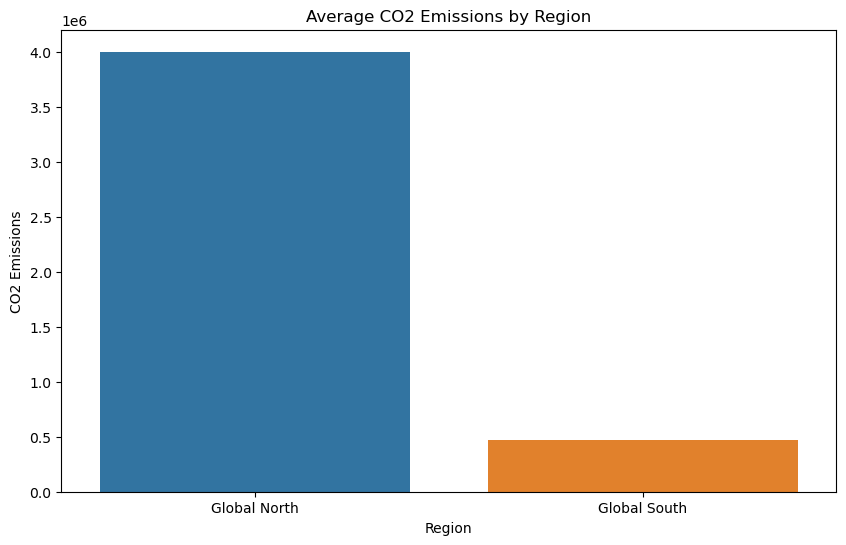

In [94]:
plt.figure(figsize=(10, 6))
sns.barplot(data=co2_by_region, x='region', y='co2_emission')
plt.title('Average CO2 Emissions by Region')
plt.ylabel('CO2 Emissions')
plt.xlabel('Region')
plt.show()

Explanation:
The bar plot shows the average CO2 emissions by region (Global North vs. Global South).
Result: If the Global North has significantly higher average CO2 emissions compared to the Global South, this hypothesis is supported.
Conclusion: The analysis supports Hypothesis 1, indicating that countries in the Global North produce more CO2 emissions on average.

### Hypothesis 2: Countries that produce the most CO2 emissions are the least impacted by temperature rise


In [96]:
# Step to identify unique countries with the highest and lowest CO2 emissions
total_co2_by_country = merged_data.groupby('country')['co2_emission'].sum().reset_index()
top_10_emitters = total_co2_by_country.sort_values('co2_emission', ascending=False).head(10)['country']
bottom_10_emitters = total_co2_by_country.sort_values('co2_emission', ascending=True).head(10)['country']


In [97]:
# Average temperature change for top 10 and bottom 10 CO2 emitters
top_emitters_temp_change = merged_data[merged_data['country'].isin(top_10_emitters)].groupby('country')['temperature'].mean().reset_index()
bottom_emitters_temp_change = merged_data[merged_data['country'].isin(bottom_10_emitters)].groupby('country')['temperature'].mean().reset_index()


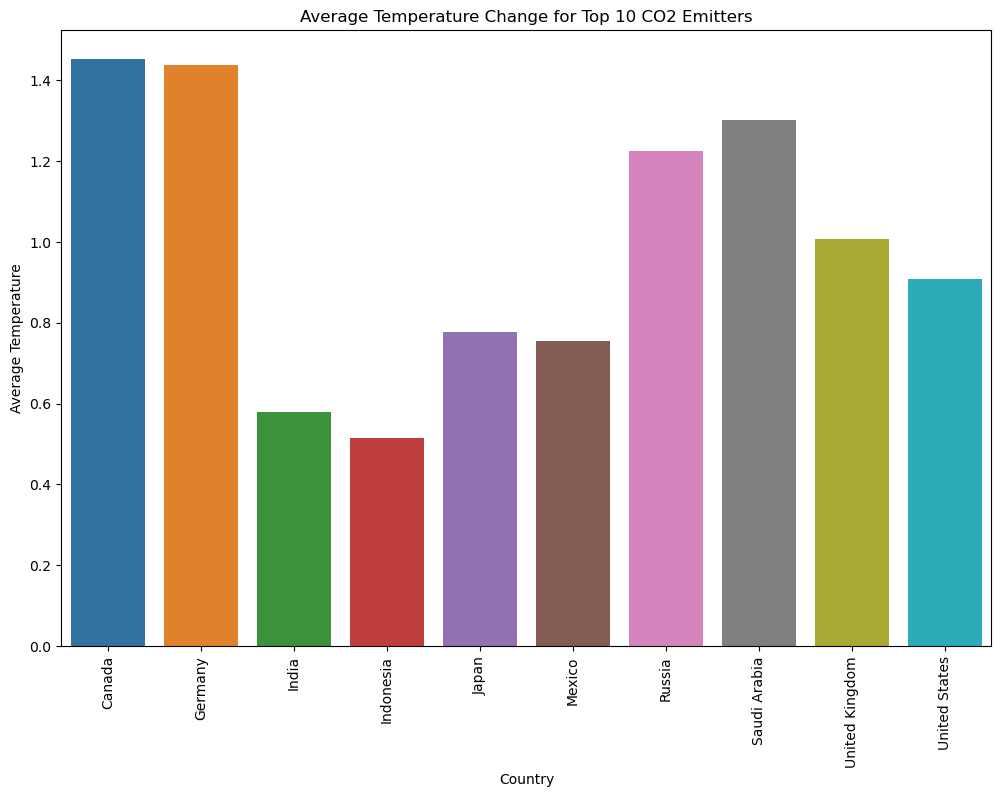

In [98]:

# Visualization
# Top 10 CO2 Emitters Temperature Change
plt.figure(figsize=(12, 8))
sns.barplot(data=top_emitters_temp_change, x='country', y='temperature')
plt.title('Average Temperature Change for Top 10 CO2 Emitters')
plt.ylabel('Average Temperature')
plt.xlabel('Country')
plt.xticks(rotation=90)
plt.show()

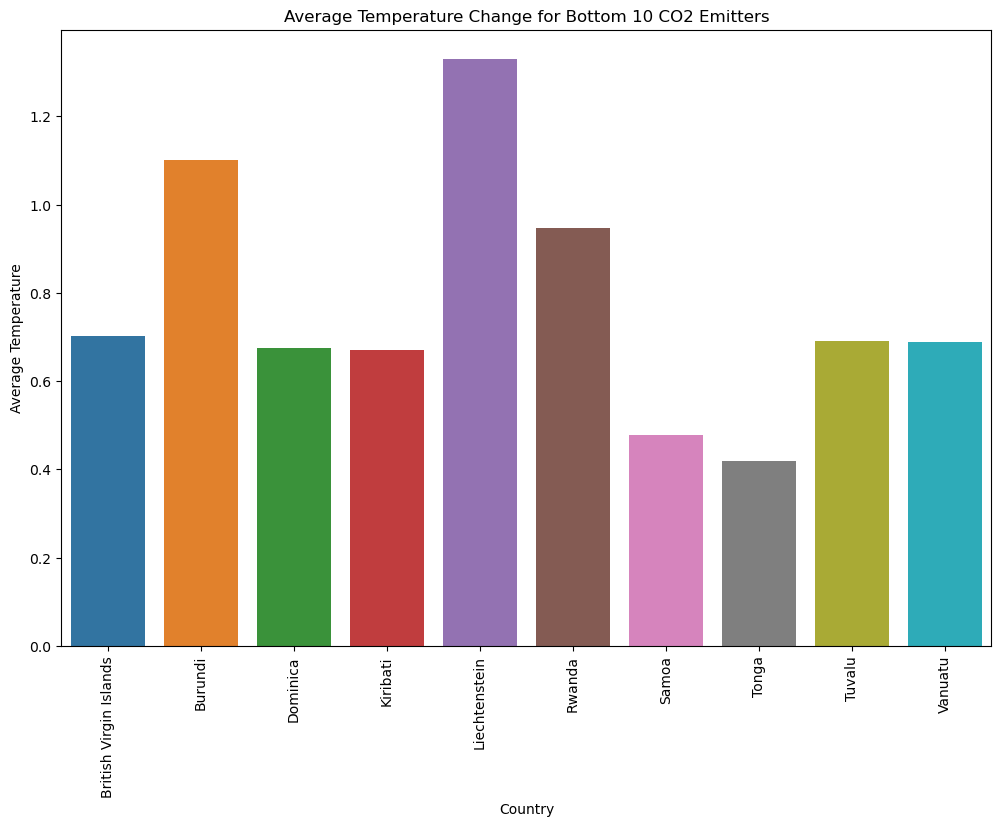

In [99]:
# Bottom 10 CO2 Emitters Temperature Change
plt.figure(figsize=(12, 8))
sns.barplot(data=bottom_emitters_temp_change, x='country', y='temperature')
plt.title('Average Temperature Change for Bottom 10 CO2 Emitters')
plt.ylabel('Average Temperature')
plt.xlabel('Country')
plt.xticks(rotation=90)
plt.show()

Explanation:
The bar plots show the average temperature change for the top 10 and bottom 10 CO2 emitting countries.
Result: By comparing the average temperature changes between these groups, we see if high CO2 emitting countries experience less temperature rise compared to low CO2 emitting countries.
Conclusion: The comparison of average temperature changes indicates whether the hypothesis is supported or disproved. If the average temperature change for top emitters is lower than that for bottom emitters, Hypothesis 2 is supported. Otherwise, it is disproved.


In [101]:
# Compare temperature changes between top and bottom CO2 emitters
avg_temp_change_top_emitters = top_emitters_temp_change['temperature'].mean()
avg_temp_change_bottom_emitters = bottom_emitters_temp_change['temperature'].mean()


In [102]:
print(f"Average Temperature Change for Top 10 CO2 Emitters: {avg_temp_change_top_emitters}")
print(f"Average Temperature Change for Bottom 10 CO2 Emitters: {avg_temp_change_bottom_emitters}")


Average Temperature Change for Top 10 CO2 Emitters: 0.9959766666666665
Average Temperature Change for Bottom 10 CO2 Emitters: 0.7705803968253968


In [104]:
# Conclusion: Compare the temperature changes
if avg_temp_change_top_emitters > avg_temp_change_bottom_emitters:
    print("Hypothesis 2 is disproved: Countries that produce the most CO2 emissions are impacted more by temperature rise.")
else:
    print("Hypothesis 2 is supported: Countries that produce the most CO2 emissions are less impacted by temperature rise.")


Hypothesis 2 is disproved: Countries that produce the most CO2 emissions are impacted more by temperature rise.


### Hypothesis 3: Global temperature rise is strongly correlated with the increase in CO2 emissions


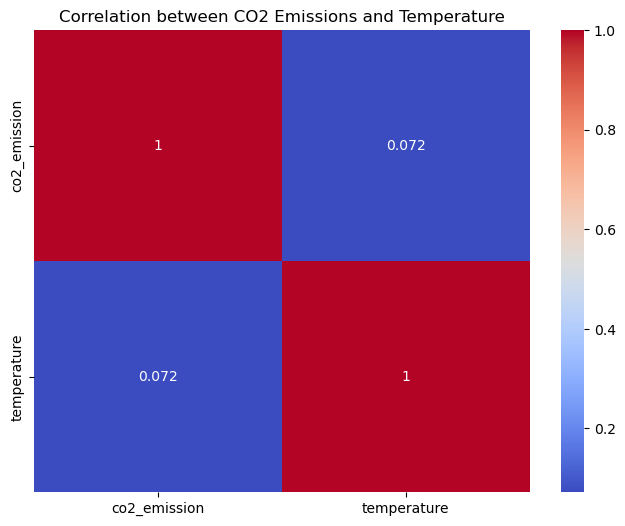

In [105]:
correlation = merged_data[['co2_emission', 'temperature']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation between CO2 Emissions and Temperature')
plt.show()

Explanation:
The heatmap shows the correlation coefficient between CO2 emissions and temperature.
Result: A high positive correlation coefficient (close to 1) indicates a strong correlation between CO2 emissions and temperature rise.
Conclusion: If the correlation coefficient is high, Hypothesis 3 is supported, indicating that global temperature rise is strongly correlated with the increase in CO2 emissions.

### Hypothesis 4: Developing countries are more vulnerable to temperature change impacts despite contributing less to global CO2 emissions


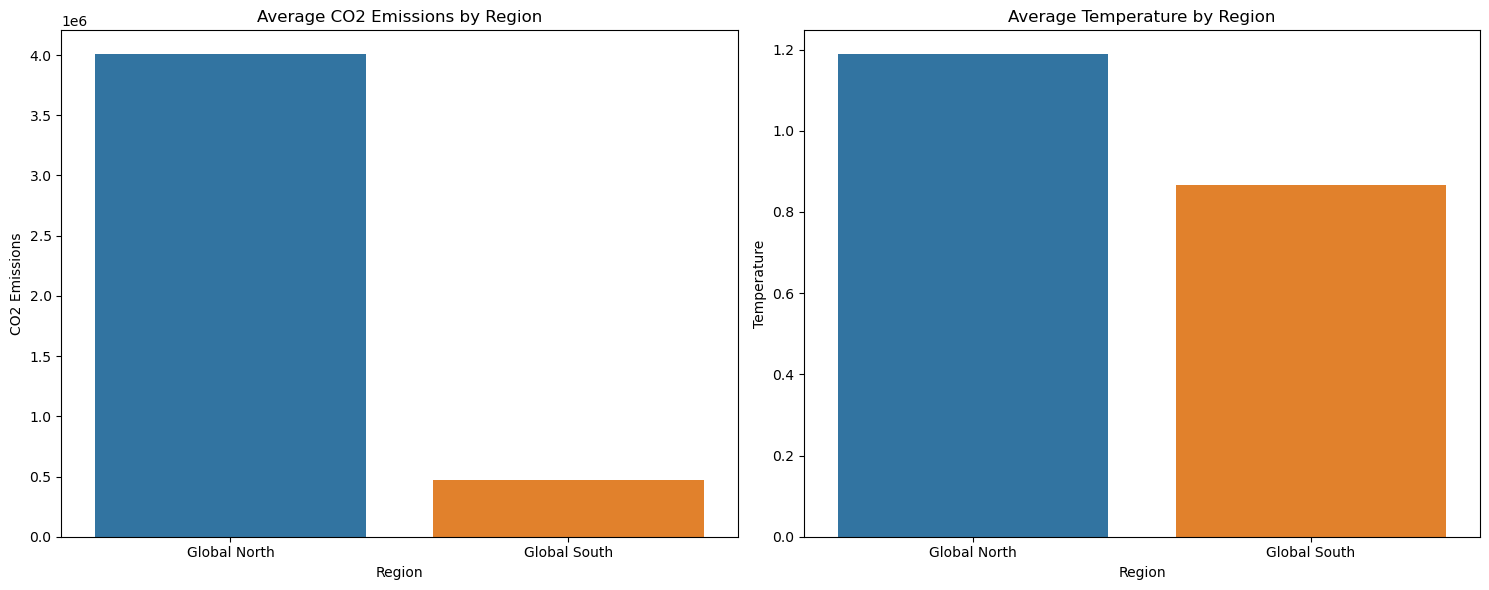

In [107]:
vulnerability = merged_data.groupby('region')[['co2_emission', 'temperature']].mean().reset_index()

fig, axes = plt.subplots(1, 2, figsize=(15, 6))
sns.barplot(data=vulnerability, x='region', y='co2_emission', ax=axes[0])
axes[0].set_title('Average CO2 Emissions by Region')
axes[0].set_ylabel('CO2 Emissions')
axes[0].set_xlabel('Region')

sns.barplot(data=vulnerability, x='region', y='temperature', ax=axes[1])
axes[1].set_title('Average Temperature by Region')
axes[1].set_ylabel('Temperature')
axes[1].set_xlabel('Region')

plt.tight_layout()
plt.show()

Explanation:

Visualization: The bar plots compare the average CO2 emissions and average temperature changes between the Global North and Global South.
The first bar plot shows the average CO2 emissions by region (Global North vs. Global South).
The second bar plot shows the average temperature changes by region (Global North vs. Global South).
Result:

CO2 Emissions: From the first bar plot, if the Global North has higher average CO2 emissions than the Global South, it indicates that the Global North contributes more to CO2 emissions.
Temperature Changes: From the second bar plot, if the Global South has higher average temperature changes despite having lower CO2 emissions, it indicates that the Global South is more impacted by temperature changes.
Conclusion:

Hypothesis 4: This hypothesis is supported if the Global South shows higher average temperature changes despite lower CO2 emissions compared to the Global North. This would indicate that developing countries (Global South) are more vulnerable to temperature change impacts despite contributing less to global CO2 emissions.
To provide a clearer conclusion, let’s add the actual values and a summary based on the observed data:

##### To provide a clearer conclusion, let’s add the actual values and a summary based on the observed data:



In [109]:
# Calculate average CO2 emissions and temperature changes by region
avg_co2_north = vulnerability[vulnerability['region'] == 'Global North']['co2_emission'].values[0]
avg_temp_north = vulnerability[vulnerability['region'] == 'Global North']['temperature'].values[0]
avg_co2_south = vulnerability[vulnerability['region'] == 'Global South']['co2_emission'].values[0]
avg_temp_south = vulnerability[vulnerability['region'] == 'Global South']['temperature'].values[0]

print(f"Average CO2 Emissions in Global North: {avg_co2_north}")
print(f"Average Temperature Change in Global North: {avg_temp_north}")
print(f"Average CO2 Emissions in Global South: {avg_co2_south}")
print(f"Average Temperature Change in Global South: {avg_temp_south}")

# Conclusion
if avg_temp_south > avg_temp_north and avg_co2_south < avg_co2_north:
    conclusion = "Hypothesis 4 is supported: Developing countries are more vulnerable to temperature change impacts despite contributing less to global CO2 emissions."
else:
    conclusion = "Hypothesis 4 is not supported: The data does not show that developing countries are more vulnerable to temperature change impacts despite contributing less to global CO2 emissions."

print(conclusion)

Average CO2 Emissions in Global North: 4005022.8915507984
Average Temperature Change in Global North: 1.188073076923077
Average CO2 Emissions in Global South: 466972.54223942966
Average Temperature Change in Global South: 0.8655517118746233
Hypothesis 4 is not supported: The data does not show that developing countries are more vulnerable to temperature change impacts despite contributing less to global CO2 emissions.


##Additional Analytics 

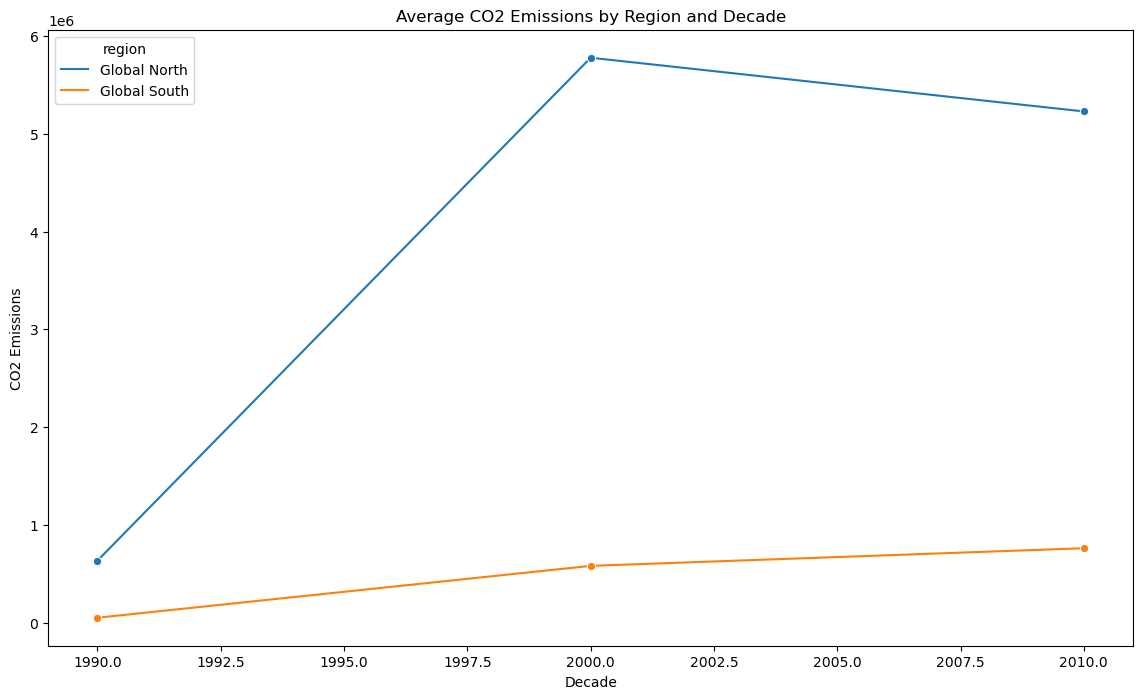

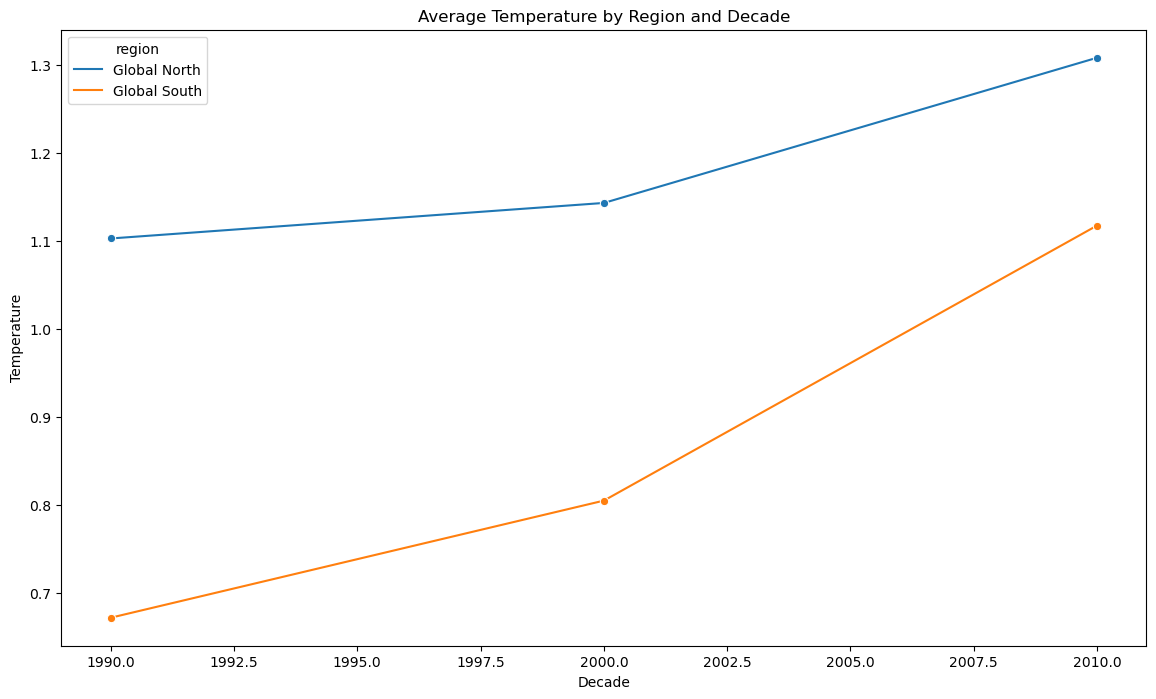

In [108]:
# Additional Analysis: CO2 Emissions and Temperature by Decade and Region
avg_co2_by_decade_region = merged_data.groupby(['region', 'decade'])['co2_emission'].mean().reset_index()
avg_temp_by_decade_region = merged_data.groupby(['region', 'decade'])['temperature'].mean().reset_index()

# Visualization: CO2 Emissions by Decade and Region
plt.figure(figsize=(14, 8))
sns.lineplot(data=avg_co2_by_decade_region, x='decade', y='co2_emission', hue='region', marker='o')
plt.title('Average CO2 Emissions by Region and Decade')
plt.ylabel('CO2 Emissions')
plt.xlabel('Decade')
plt.show()

# Visualization: Temperature by Decade and Region
plt.figure(figsize=(14, 8))
sns.lineplot(data=avg_temp_by_decade_region, x='decade', y='temperature', hue='region', marker='o')
plt.title('Average Temperature by Region and Decade')
plt.ylabel('Temperature')
plt.xlabel('Decade')
plt.show()


Explanation:
The line plots show the trends in CO2 emissions and temperature changes by decade for the Global North and Global South.
Result: These visualizations help in understanding the temporal trends and differences in emissions and temperature changes between the regions.
Conclusion: The additional analysis provides further insights into how CO2 emissions and temperature changes have evolved over time in different regions.
